In [8]:
import tensorflow as tf       #build model
import pandas as pd           #data manipulation and preprocessing
import numpy as np            #maths computations
import tensorflow_datasets as tfds   #dataset
import matplotlib.pyplot as plt

In [9]:
dataset ,dataset_info = tfds.load('malaria',with_info=True,shuffle_files=True,as_supervised=True,split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteZKZZ8G/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [10]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [11]:
for data in dataset[0].take(2):
  print(data)

(<tf.Tensor: shape=(145, 148, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(133, 127, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [12]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmpqmui4n28tfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},


In [13]:
#define function for splitting
def splits(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
  DATASET_SIZE = len(dataset)

  train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

  val_dataset1 = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_dataset = val_dataset1.take(int(VAL_RATIO*DATASET_SIZE))

  test_dataset =  val_dataset1.skip(int(VAL_RATIO*DATASET_SIZE))

  return train_dataset, val_dataset,test_dataset

In [14]:
#calling function
TRAIN_RATIO = 0.8
VAL_RATIO =0.1
TEST_RATIO =0.1

train_dataset,val_dataset,test_dataset = splits(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)

print(list(train_dataset.take(1).as_numpy_iterator()),
      list(val_dataset.take(1).as_numpy_iterator()),
      list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

<ipython-input-15-1873d7900d91>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(5,5,i+1)


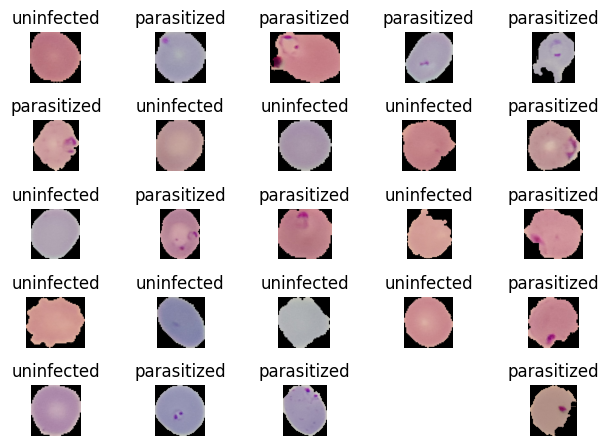

In [15]:
for i,(image,label) in enumerate(train_dataset.take(25)):
  ax = plt.subplot(5,5,i+1)

  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.tight_layout()
  plt.axis('off')


In [16]:
IM_SIZE = 224
def resize_rescale(image,label):
  return tf.image.resize(image,(IM_SIZE,IM_SIZE))/255.0 ,label

In [17]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

In [18]:
for image,label in train_dataset.take(1):
  print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [19]:
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset   = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

**MODEL SUBCLASSING**

In [ ]:
'''from tensorflow.keras.models import Model
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization ,Input,Layer

class FeatureExtractor(Layer):
 def __init__(self):
  super(FeatureExtractor,self).__init__()

  self.Conv2D_1 = Conv2D(filters = 6,kernel_size = 3,strides=(1, 1),padding='valid',activation='relu')
  self.batch_1 = BatchNormalization()
  self.maxpool_1 = MaxPool2D(pool_size=(2, 2),strides=2)

  self.Conv2D_2 = Conv2D(filters = 16,kernel_size =3,strides=(1, 1),padding='valid',activation='relu')
  self.batch_1 = BatchNormalization()
  self.maxpool_1 = MaxPool2D(pool_size=(2, 2),strides=2)

 def call(self,x ,training):

  x=self.Conv2D_1(x)
  x=self.batch_1(x)
  x=self.maxpool_1(x)

  x=self.Conv2D_2(x)
  x=self.batch_2(x)
  x=self.maxpool_2(x)

  return x

feature_sub_classed = FeatureExtractor()'''

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization ,Input,Layer

class FeatureExtractor(Layer):
 def __init__(self,filters,kernel_size,strides,padding,activation,pool_size):
  super(FeatureExtractor,self).__init__()

  self.Conv2D_1 = Conv2D(filters=filters ,kernel_size=kernel_size, strides=strides, padding= padding, activation=activation)
  self.batch_1 = BatchNormalization()
  self.maxpool_1 = MaxPool2D(pool_size=pool_size,strides=2*strides)

  self.Conv2D_2 = Conv2D(filters=filters*2 ,kernel_size=kernel_size, strides=strides, padding= padding, activation=activation)
  self.batch_2 = BatchNormalization()
  self.maxpool_2 = MaxPool2D(pool_size=pool_size,strides=2*strides)

 def call(self,x ,training):

  x=self.Conv2D_1(x)
  x=self.batch_1(x)
  x=self.maxpool_1(x)

  x=self.Conv2D_2(x)
  x=self.batch_2(x)
  x=self.maxpool_2(x)

  return x

feature_sub_classed = FeatureExtractor(8,3,1,'valid','relu',2)

In [ ]:
'''func_input = Input(shape=(IM_SIZE,IM_SIZE,3),name = "Input_Image")

x=feature_sub_classed(func_input)

x=Flatten()(x)

x=Dense(100,activation ="relu")(x)
x=BatchNormalization()(x)

x=Dense(10 ,activation ="relu")(x)
x=BatchNormalization()(x)

func_output = Dense(1  ,activation ="sigmoid")(x)

lenet_model_func = Model(func_input,func_output,name = "lenet_model")

lenet_model_func.summary()'''



In [24]:
class LenetModel(Model):
  def __init__(self):
    super(LenetModel,self).__init__()

    self.feature_extractor = FeatureExtractor(8,3,1,'valid','relu',2)

    self.flatten = Flatten()

    self.dense_1 = Dense(100 ,activation ="relu")
    self.batch_1 = BatchNormalization()

    self.dense_2 = Dense(10 ,activation ="relu")
    self.batch_2 = BatchNormalization()

    self.dense_3 = Dense(1  ,activation ="sigmoid")

  def call(self,x):

    x=self.feature_extractor(x)

    x=self.flatten(x)

    x=self.dense_1(x)
    x=self.batch_1(x)

    x=self.dense_2(x)
    x=self.batch_2(x)

    x=self.dense_3(x)

    return x

lenet_model_classed = LenetModel()
lenet_model_classed(tf.zeros([1,224,224,3]))
lenet_model_classed.summary()




Model: "lenet_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_5 (Featu  multiple                  1488      
 reExtractor)                                                    
                                                                 
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_9 (Dense)             multiple                  4665700   
                                                                 
 batch_normalization_18 (Ba  multiple                  400       
 tchNormalization)                                               
                                                                 
 dense_10 (Dense)            multiple                  1010      
                                                                 
 batch_normalization_19 (Ba  multiple                

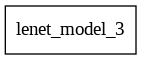

In [25]:
tf.keras.utils.plot_model(lenet_model_classed,to_file="model.png",show_shapes=True)

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

lenet_model_classed.compile (
                 optimizer = Adam(learning_rate = 0.01),
                 loss = BinaryCrossentropy(),
                 metrics = 'accuracy'
)

In [27]:
#training the model
history = lenet_model_classed.fit(train_dataset,validation_data = val_dataset,epochs=10, verbose =1)

Epoch 1/10
689/689 [==============================] - 49s 62ms/step - loss: 0.3084 - accuracy: 0.8737 - val_loss: 0.8289 - val_accuracy: 0.5419
Epoch 2/10
689/689 [==============================] - 44s 64ms/step - loss: 0.1880 - accuracy: 0.9377 - val_loss: 0.2348 - val_accuracy: 0.9394
Epoch 3/10
689/689 [==============================] - 42s 61ms/step - loss: 0.1669 - accuracy: 0.9472 - val_loss: 0.2865 - val_accuracy: 0.9510
Epoch 4/10
689/689 [==============================] - 50s 73ms/step - loss: 0.1490 - accuracy: 0.9533 - val_loss: 0.3996 - val_accuracy: 0.7760
Epoch 5/10
689/689 [==============================] - 51s 74ms/step - loss: 0.1439 - accuracy: 0.9545 - val_loss: 0.2415 - val_accuracy: 0.9299
Epoch 6/10
689/689 [==============================] - 43s 63ms/step - loss: 0.1341 - accuracy: 0.9576 - val_loss: 0.1796 - val_accuracy: 0.9488
Epoch 7/10
689/689 [==============================] - 43s 62ms/step - loss: 0.1266 - accuracy: 0.9590 - val_loss: 0.3062 - val_accuracy:

In [28]:
print(history.history)

{'loss': [0.30844515562057495, 0.18801264464855194, 0.16686177253723145, 0.14896288514137268, 0.14385925233364105, 0.13408617675304413, 0.12656426429748535, 0.12689010798931122, 0.1286429464817047, 0.17161333560943604], 'accuracy': [0.8736732006072998, 0.9376757740974426, 0.9472013115882874, 0.9532794952392578, 0.9545495510101318, 0.9575886726379395, 0.9589948058128357, 0.9590401649475098, 0.9589948058128357, 0.9389911890029907], 'val_loss': [0.8289360404014587, 0.23477032780647278, 0.28652411699295044, 0.39956218004226685, 0.24146407842636108, 0.17958055436611176, 0.3061878979206085, 0.25583067536354065, 0.8663938641548157, 0.21980686485767365], 'val_accuracy': [0.5419237613677979, 0.9393829107284546, 0.9509981870651245, 0.7760435342788696, 0.9299455285072327, 0.9488203525543213, 0.9451905488967896, 0.9448275566101074, 0.6823956370353699, 0.9426497220993042]}


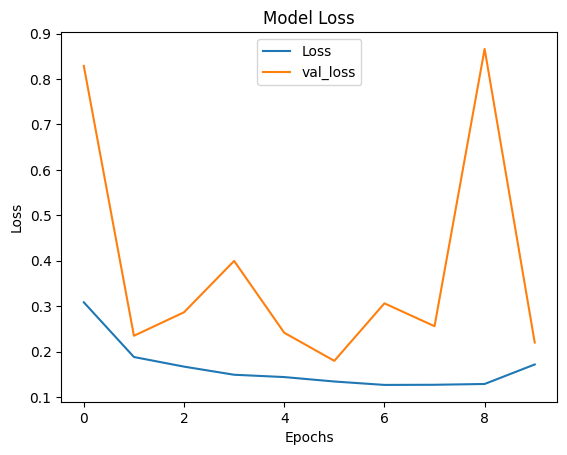

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','val_loss'])
plt.show()

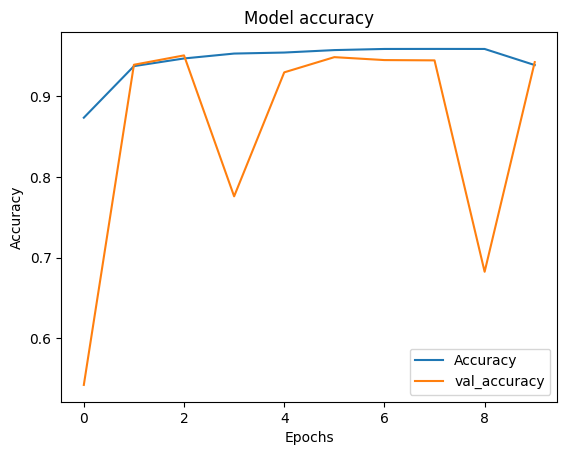

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','val_accuracy'])
plt.show()

In [32]:
test_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [33]:
test_dataset = test_dataset.batch(1)

In [34]:
lenet_model_classed.evaluate(test_dataset)

2757/2757 [==============================] - 22s 3ms/step - loss: 0.2245 - accuracy: 0.9383


[0.22453175485134125, 0.9383387565612793]

In [35]:
def parasite_or_not(x):
  if(x<0.5):
    return str('P')
  else:
    return str('U')

In [37]:
parasite_or_not(lenet_model_classed.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 12s 12s/step


'U'

1/1 [==============================] - 0s 27ms/step


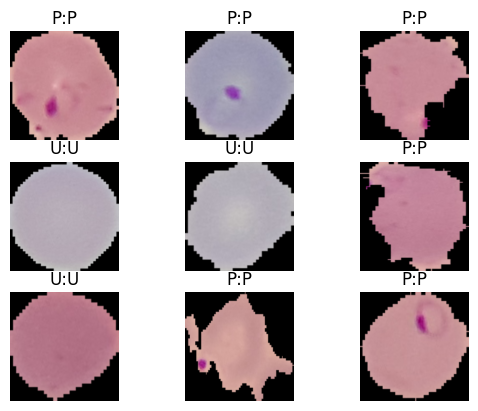

In [39]:
for i,(image,label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(lenet_model_classed.predict(image)[0][0])))

  plt.axis('off')

In [41]:
lenet_model_classed.save('lenet_save_model_subclassed')